# Epymorph Parameter Update
_author: Ajay Shyam Pasam_



This Jupyter notebook demonstrates how to specify parameters using Python functions. A recent enhancement allows users to input both scalar values and Python functions in both the TOML file and through the API. This feature empowers users to define functions with various signatures for parameter specification.

## Accepted Function Signatures

1. **Scalar Value**
    ```python
    def function_name(_, _):
    ```

    This signature is used when the parameter value remains constant across both time and nodes.

2. **Time-Specific Value**
    ```python
    def function_name(t, _):
    ```

    This signature is employed when the parameter value varies with time but remains constant across nodes.

3. **Time and Node**
    ```python
    def function_name(t, n):
    ```

    This signature is useful when the parameter value depends on both time and nodes.

4. **Node**
    ```python
    def function_name(_, n):
    ```

    This signature allows users to specify a parameter that varies with nodes but remains constant across time.

With these flexible function signatures, users can easily tailor parameter functions to meet the dynamic requirements of their simulations. Whether defining constant values, time-dependent parameters, node-specific variations, or combinations thereof, this feature enhances the versatility of parameter specification.


# Utilizing Geo Parameters in Your Python Functions

When users wish to incorporate their Python functions for parameter calculations during simulations, particularly when requiring geo attributes, the Geo Proxy object serves as a valuable tool. By integrating the Geo Proxy object into their Python environment, users gain the capability to calculate parameter values based on specified geo attributes.

To get started, users can import the Geo Proxy object, typically referred to as `G`:
```python
from epymorph.abstract import proxy as G
```
With the imported Proxy object, users can define their geo parameters within their Python functions. When executing the parameter function, the accessibility of data is contingent on the specified geo, the existence of the attribute, and the correct attribute shape.

Note:
If users are working with an internal Geo constructed by the Epymorph team, a thorough understanding of Geo composition and data structure is crucial. Detailed information is available in the official documentation, guiding users on Geo attributes, shapes, and their proper utilization.


In [1]:
from datetime import date

import matplotlib.pyplot as plt
import numpy as np

from epymorph.context import SimContext
from epymorph.data import geo_library, ipm_library, mm_library

from math import exp, log


# Running an SIRS Model With Pei Beta Function


## Simulation Configuration

The following code snippet configures a simulation (`sim1`) using different components from available libraries. This simulation is configured with a specific geographic area, an Intra Population Model (IPM), and a Movement Model (MVM).

```python
sim1 = Simulation(
    geo=geo_library['pei'](),
    ipm_builder=ipm_library['sirs'](),
    mvm_builder=mm_library['pei']())
```

## Available Resources

### Geographic Areas
The simulation allows users to choose from the following geographic areas:

- **Single_Pop**
- **pei**
- **us_counties**
- **us_states**
- **us_sw_counties**
- **Maricopa**

### Intra Population Models (IPMs)
Users can select from various Intra Population Models to capture different disease dynamics. The available IPMs are:

- **pei**
- **series**
- **sirh**
- **sirs**
- **sparsemod**

### Movement Models (MVMs)
Movement Models describe the movement of individuals within the specified geographic area. Users can choose from the following Movement Models:

- **Centroid**
- **icecube**
- **no** No Movement
- **pei** Movement according to the PEI model
- **sparsemod** Movement according to the SparseMod model

## Available Resources Information

- **Geo Libraries:** The available geographic libraries provide predefined structures for different geographic areas. Users can choose the one that best fits their simulation scenario.

- **IPM Libraries:** Intra Population Models capture the disease dynamics within a population. Users can select the appropriate IPM based on the characteristics they want to simulate.

- **MVM Libraries:** Movement Models define how individuals move within the specified geographic area. Users can choose a Movement Model that aligns with the movement patterns they want to simulate.

**Note:** For more detailed information on each geographic area, Intra Population Model, and Movement Model, users are encouraged to refer to the official documentation. Understanding the characteristics and structure of each resource is essential for accurate and meaningful simulations.
```


In [2]:
from epymorph.simulation import Simulation
sim1 = Simulation(
    geo=geo_library['pei'](),
    ipm_builder=ipm_library['sirs'](),
    mvm_builder=mm_library['pei']())


## Using the Humidity Geo Parameters in Python Function to calculate the Beta Value

The following Python function, `calculate_beta`, demonstrates how to incorporate Geo parameters into a function intended for use in a simulation. This example assumes the use of the Geo Proxy object (`G`), which needs to be imported from the Epymorph abstract library.

```python
from epymorph.geo.abstract import proxy as G

def calculate_beta(t, n):
    H = G['humidity'][t, n]

    beta = (exp(-180 * H + log(2.0 - 1.3)) + 1.3) / 4.0 
    return beta
```

## Explanation

- **`calculate_beta` Function:**
  - The function takes two parameters, `t` and `n`, representing time and node, respectively.
  - It uses the Geo Proxy object (`G`) to access the 'humidity' attribute at the specified time `t` and node `n`.
  - The function calculates the beta value based on the retrieved humidity value.

- **Geo Proxy Object (`G`):**
  - The Geo Proxy object (`G`) provides a convenient way to access Geo parameters within Python functions.
  - By using this proxy, users can seamlessly integrate Geo attributes into their functions without the need for additional imports.

**Note:** 
- Ensure that the Geo Proxy object is correctly imported from the Epymorph abstract library (`epymorph.abstract.proxy`) before using it in your Python functions.
- For further details on available Geo parameters, their attributes, and proper usage, users are encouraged to refer to the official documentation. Understanding the Geo structure is crucial for accurate and contextually relevant simulations.
```

In [3]:
from epymorph.abstract import proxy as G
def calculate_beta(t,n):
    H = G['humidity'][t, n]

    beta = (exp(-180 * H + log(2.0 - 1.3)) + 1.3) / 4.0 
    return beta


## Initialization in Epymorph

In Epymorph, initialization strategies are crucial for setting the initial conditions of a simulation. The following code showcases the usage of the `single_location` initializer and provides information about various available initializers.

```python
from epymorph.initializer import single_location

def init(ctx: SimContext):
    return single_location(ctx, location=0, seed_size=10_000)
```

## Available Initializers

1. **`single_location`**
   - *Description:* Infects a fixed number of people at a single location (by index).
   - *Parameters:*
      - `location`: Index of the location to infect.
      - `seed_size`: The number of individuals to infect in total.

2. **`indexed_locations`**
   - *Description:* Infects a fixed number of people distributed across a selection of nodes. Uses a multivariate hypergeometric draw based on available populations.
   - *Parameters:*
      - `selection`: One-dimensional array of indices; all values must be in the range (-N, +N).
      - `seed_size`: The number of individuals to infect in total.

3. **`labeled_locations`**
   - *Description:* Infects a fixed number of people across a specified selection of locations (by label).
   - *Parameters:*
      - `labels`: Labels of the locations to select for infection.
      - `seed_size`: The number of individuals to infect in total.

4. **`random_locations`**
   - *Description:* Infects a total of `seed_size` individuals spread randomly across a random selection of locations.

5. **`top_locations`**
   - *Description:* Infects a fixed number of people across a fixed number of top locations, measured by a given geo attribute.
   
6. **`bottom_locations`**
   - *Description:* Infects a fixed number of people across a fixed number of bottom locations, measured by a given geo attribute.

7. **`explicit`**
   - *Description:* Sets all compartments explicitly.
   - *Parameters:*
      - `initials`: A (N, C) numpy array of SimDType.

8. **`proportional`**
   - *Description:* Sets all compartments as a proportion of their population according to the geo. The parameter array provided will be normalized and multiplied element-wise by the geo population.
   - *Parameters:*
      - `ratios`: A (C,) or (N, C) numpy array describing the ratios for each compartment.

These initializers provide flexibility in setting the initial conditions of a simulation based on different criteria such as locations, populations, and explicit compartment values. Users are encouraged to choose the most suitable initializer based on their simulation requirements.
```

In [4]:
from epymorph.initializer import  single_location
def init(ctx: SimContext):
    return single_location(ctx, location=0, seed_size=10_000)


## Passing Parameters to a Simulation

In the provided code snippet:

```python
param = {
    'beta': calculate_beta,
    'gamma': 0.25,
    'xi': 0.0111,
    'phi': 40.0,
    'theta': 0.1,
    'move_control': 0.9,
}
```

- **`'beta'`:** This key is associated with the function `calculate_beta`, allowing users to dynamically calculate the transmission rate during the simulation.

- **`'gamma', 'xi', 'phi', 'theta', 'move_control'`:** These keys are associated with scalar values, representing various constants in the simulation.

**Passing Parameters:**
- Users can customize the values or functions associated with each key in the `param` dictionary based on their specific simulation requirements.
  
- Dynamic parameters like `'beta'` can be functions, providing flexibility to recalculate values during the simulation, while scalar values represent static parameters.

This modular approach enables users to easily adjust simulation parameters without modifying the core simulation code, allowing for efficient exploration of different scenarios.
```

In [5]:
param = {
    'beta': calculate_beta ,
    'gamma': 0.25,
    'xi': 0.0111,
    'phi': 40.0,
    'theta': 0.1,
    'move_control': 0.9,
}



## Running the Simulation

To execute the simulation (`sim1`), the following code snippet is utilized:

```python
out1 = sim1.run(
    param=param,
    start_date=date(2015, 1, 1),
    duration_days=365,
    initializer=init,
    rng=np.random.default_rng(1)
)
```

- **`param=param`:** The `param` dictionary, containing simulation parameters, is passed to the simulation.

- **`start_date=date(2015, 1, 1)`:** Specifies the starting date of the simulation, set to January 1, 2015, in this case.

- **`duration_days=365`:** Sets the duration of the simulation to 365 days.

- **`initializer=init`:** The initializer function `init` is used to set the initial conditions of the simulation.

- **`rng=np.random.default_rng(1)`:** The `rng` parameter allows users to provide a random number seed value for reproducibility. In this example, it uses the NumPy random number generator with seed `1`. This parameter is optional, and users can omit it if they don't require a specific seed.

## Simulation Output

The result of the simulation is stored in the variable `out1`. The output of a simulation run (`out1`) includes the following information:

- **`ctx: SimContext`**
  - The context under which this output was generated.

- **`prevalence: NDArray[SimDType]`**
  - Prevalence data by timestep, population, and compartment.
  - Array of shape `(T, N, C)` where `T` is the number of ticks in the simulation, `N` is the number of populations, and `C` is the number of compartments.

- **`incidence: NDArray[SimDType]`**
  - Incidence data by timestep, population, and event.
  - Array of shape `(T, N, E)` where `T` is the number of ticks in the simulation, `N` is the number of populations, and `E` is the number of events.

- **`initial: NDArray[SimDType]`**
  - Initial prevalence data by population and compartment.
  - Array of shape `(N, C)` where `N` is the number of populations, and `C` is the number of compartments.

Users can leverage this output to analyze the prevalence and incidence data over time, as well as understand the initial conditions of the simulation for each population and compartment.


In [6]:
out1 = sim1.run(
    param=param,
    start_date=date(2015, 1, 1),
    duration_days=365,
    initializer=init,
    rng=np.random.default_rng(1)
)


# Running an PEI Model

In [7]:

sim2 = Simulation(
    geo=geo_library['pei'](),
    ipm_builder=ipm_library['pei'](),
    mvm_builder=mm_library['pei']())

def init(ctx: SimContext):
    return single_location(ctx, location=0, seed_size=10_000)

param = {
     'theta': 0.1,
     'move_control': 0.9,
     'infection_duration': 4.0,
     'immunity_duration': 90.0,
}

out2 = sim2.run(
    param=param,
    start_date=date(2015, 1, 1),
    duration_days=365,
    initializer=init,
    rng=np.random.default_rng(1)
)


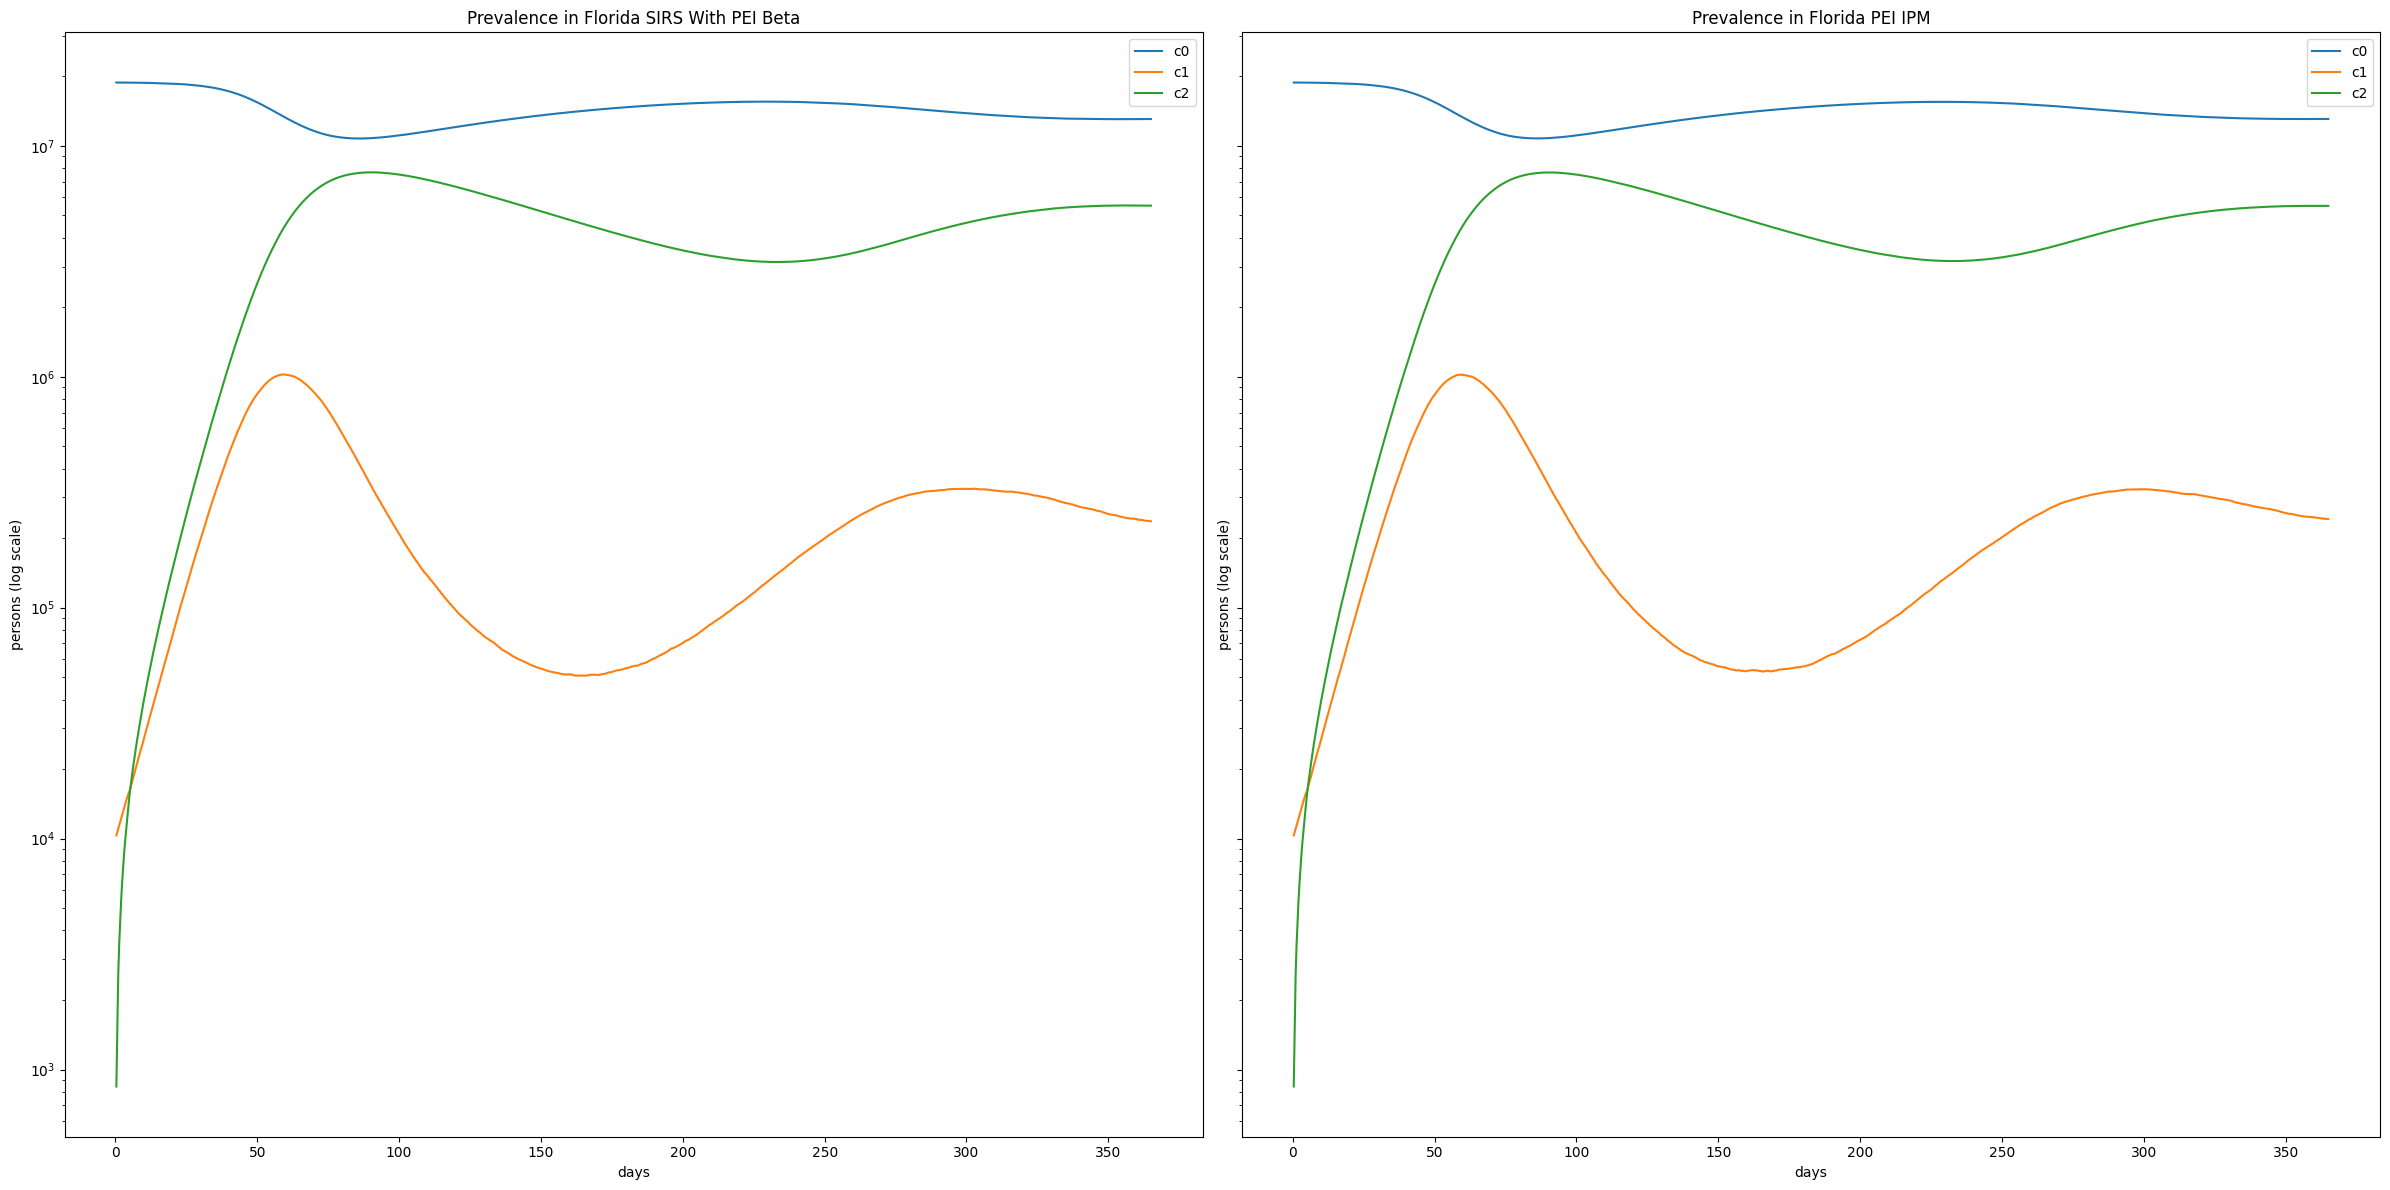

In [8]:
from epymorph.simulation import Output
from epymorph.util import stridesum


def plot_subplots(out1, out2,label1, label2, figsize=(12, 6),pop1 = 0,pop2 = 0):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=figsize)
    
    x_axis1 = [t.tausum for t in out1.ctx.clock.ticks]
    ax1.set_title(f"{label1}")
    ax1.set_xlabel('days')
    ax1.set_ylabel('persons (log scale)')
    ax1.set_yscale('log')
    
    compartments1 = [f"c{n}" for n in range(out1.ctx.compartments)]
    for i, event in enumerate(compartments1):
        y_axis = out1.prevalence[:, pop1, i]
        ax1.plot(x_axis1, y_axis, label=event)
    if out1.ctx.compartments <= 12:
        ax1.legend()

    x_axis2 = [t.tausum for t in out2.ctx.clock.ticks]
    ax2.set_title(f"{label2}")
    ax2.set_xlabel('days')
    ax2.set_ylabel('persons (log scale)')
    ax2.set_yscale('log')
    
    compartments2 = [f"c{n}" for n in range(out2.ctx.compartments)]
    for i, event in enumerate(compartments2):
        y_axis = out2.prevalence[:, pop2, i]
        ax2.plot(x_axis2, y_axis, label=event)
    if out2.ctx.compartments <= 12:
        ax2.legend()
    
    fig.tight_layout()
    
    plt.show()

def event_y_axis(out: Output, event_idx: int) -> np.ndarray:
    """Utility function for graphing incidence time-series."""
    taus_per_day = len(out.ctx.clock.taus)
    y_values = np.zeros((out.ctx.nodes, out.ctx.clock.num_days))
    for pop_idx in range(out.ctx.nodes):
        events_by_tau = out.incidence[:, pop_idx, event_idx]
        y_values[pop_idx] = stridesum(events_by_tau, taus_per_day)
    return y_values.T
plot_subplots(out1, out2, label1="Prevalence in Florida SIRS With PEI Beta", label2="Prevalence in Florida PEI IPM", pop1 = 0,pop2=0, figsize=(24, 12))


# Passing string functions directly to a simulation

In [9]:

from epymorph.run import plot_pop


sim = Simulation(
    geo=geo_library['pei'](),
    ipm_builder=ipm_library['sirs'](),
    mvm_builder=mm_library['pei']())

def init(ctx: SimContext):
    return single_location(ctx, location=0, seed_size=10_000)

param = {
    'beta':'''def calculate_beta(t,n):
    H = geo['humidity'][t, n]

    beta = (np.exp(-180 * H + np.log(2.0 - 1.3)) + 1.3) / 4.0 
    return beta''',
    'gamma': 0.25,
    'xi': 0.0111,
    'phi': 40.0,
    'theta': 0.1,
    'move_control': 0.9,
}

out3 = sim.run(
    param=param,
    start_date=date(2015, 1, 1),
    duration_days=365,
    initializer=init,
    rng=np.random.default_rng(1)
)


## Toml File

```toml
ipm = "sirs"
mm = "pei"
geo = "pei"
start_date = 2023-11-14
duration = "365d"

[init]
initializer = "single_location"
location = 0
seed_size = 10000

[params]
beta = '''
def calculate_beta(t,n):
    H = geo['humidity'][t, n]

    beta = (np.exp(-180 * H + np.log(2.0 - 1.3)) + 1.3) / 4.0 
    return beta'''
gamma= 0.25,
xi= 0.0111,
phi= 40.0,
theta= 0.1,
move_control= 0.9


In [10]:
!source .venv/bin/activate

# Now we can run the simulation:
!python -m epymorph run ./scratch/my-experiment.toml --out ./scratch/output.csv


Loading requirements:
[✓] IPM (sirs)
[✓] MM (pei)
[✓] Geo (pei)
Running simulation (BasicEngine):
• 2023-11-14 to 2024-11-13 (365 days)
• 6 geo nodes
|####################| 100% 
Runtime: 0.451s
Writing output to file: ./scratch/output.csv
Done


## Available Operations for Parameter Functions

### Numpy Math Functions
The following numpy math functions are available for use in your parameter functions:

- **radians**: Converts angles from degrees to radians.
- **degrees**: Converts angles from radians to degrees.
- **exp**: Calculates the exponential of each element in the input array.
- **log**: Computes the natural logarithm of the input array.
- **sin**: Computes the sine of the input array.
- **cos**: Computes the cosine of the input array.
- **tan**: Computes the tangent of the input array.
- **arcsin**: Computes the arcsine of the input array.
- **arccos**: Computes the arccosine of the input array.
- **arctan**: Computes the arctangent of the input array.
- **arctan2**: Computes the arctangent of the quotient of its arguments.
- **sqrt**: Computes the non-negative square root of the input array.
- **add**: Adds corresponding elements of two input arrays.
- **subtract**: Subtracts elements of the second array from the first array.
- **multiply**: Multiplies corresponding elements of two input arrays.
- **divide**: Divides elements of the first array by the second array.
- **maximum**: Compares two arrays and returns a new array containing element-wise maximum values.
- **minimum**: Compares two arrays and returns a new array containing element-wise minimum values.
- **absolute**: Computes the absolute value of the input array.
- **floor**: Rounds down the elements of the input array to the nearest integer.
- **ceil**: Rounds up the elements of the input array to the nearest integer.

### Geo Parameters Available without Imports
Users can seamlessly use the available geo parameters in their Python string functions without the need for additional imports. The namespace will handle the usage of geo parameters, allowing users to access geo attributes by simply calling `geo` followed by the desired attribute.

#### Example Usage from TOML
Here we call the are the acessing the `geo` parameter `humidity` and then slicing it based on the the time and node and later use it to calculate the beta value.

```toml
[params]
beta = '''
def calculate_beta(t,n):
    H = geo['humidity'][t, n]

    beta = (np.exp(-180 * H + np.log(2.0 - 1.3)) + 1.3) / 4.0 
    return beta'''




## Time Series Function for Beta Calculation

In Epymorph, a time series function is a dynamic approach to model parameter changes over time in simulations. The `calculate_beta` function below exemplifies this concept, specifically addressing the time-dependent variation of the transmission rate (`beta`) in an SIRS (Susceptible-Infectious-Recovered-Susceptible) model.

```python
def calculate_beta(t, _):
    if 0 <= t < 15:
        return 0.7
    elif 15 <= t < 30:
        return 0.2
    elif 30 <= t < 55:
        return 0.4
    elif 55 <= t < 75:
        return 0.1
    elif 75 <= t < 125:
        return 0.15
    elif 125 <= t < 135:
        return 1.2
    elif 135 <= t < 225:
        return 0.1
    else:
        return 1.5
```

### Understanding the Time Series Function

The `calculate_beta` function is designed to dynamically calculate the transmission rate (`beta`) based on the simulation time (`t`). It employs a series of time intervals, each associated with a specific value of `beta`. This allows for the representation of time-varying behavior in the simulation.

- **Time Intervals:**
  - The function specifies different transmission rates during specific time intervals, delineated by conditions such as `0 <= t < 15`, `15 <= t < 30`, and so on.

- **Dynamic Variation:**
  - The values of `beta` change dynamically over time, reflecting realistic scenarios where the transmission rate may vary due to external factors.

- **Customization:**
  - Users can customize the time series function by adjusting the conditions and associated `beta` values to suit the specific requirements of their simulation.

### Time Series Function with Geo Parameters for Influenza Model

In this example, the `calculate_beta` function is tailored for an influenza model. The function dynamically calculates the transmission rate (`beta`) based on both the simulation time (`t`) and the geographical node (`n`). Additionally, it incorporates a humidity factor based on geo parameters.

```python
def calculate_beta(t, n):
    geo_humidity = G['humidity'][t, n]

    if 0 <= t < 15:
        beta = 0.7
    elif 15 <= t < 30:
        beta = 0.2
    elif 30 <= t < 55:
        beta = 0.4
    elif 55 <= t < 75:
        beta = 0.1
    elif 75 <= t < 125:
        beta = 0.15
    elif 125 <= t < 135:
        beta = 1.2
    elif 135 <= t < 225:
        beta = 0.1
    else:
        beta = 1.5

    # Calculate humidity factor based on geo parameter
    humidity_factor = (max(0.003404, min(geo_humidity, 0.02008)) - 0.003404) / (0.02008 - 0.003404)
    beta *= 0.5 + humidity_factor

    return beta
```

Influenza is a respiratory disease that spreads through respiratory droplets when an infected person coughs, sneezes, or talks. The virus can survive on surfaces and in the air.

High Humidity: In regions with high humidity, respiratory droplets produced by an infected person tend to settle quickly due to increased droplet size. This reduces the likelihood of others inhaling infectious particles, resulting in a lower beta value and lower transmission rates.

Low Humidity: In regions with low humidity, smaller respiratory droplets may remain suspended in the air for longer periods, increasing the chances of others inhaling the virus. This could lead to a higher beta value and higher transmission rates.


### Time Varying Beta Function

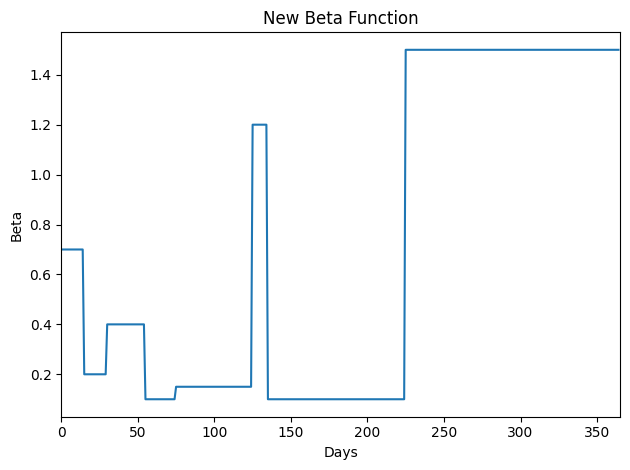

In [11]:
def calculate_beta(t,_):
    if 0 <= t < 15:
        return 0.7
    elif 15 <= t < 30:
        return 0.2
    elif 30 <= t < 55:
        return 0.4
    elif 55 <= t < 75:
        return 0.1
    elif 75 <= t < 125:
        return 0.15
    elif 125 <= t < 135:
        return 1.2
    elif 135 <= t < 225:
        return 0.1
    else:
        return 1.5

duration = 365

res = np.array([calculate_beta(d,None) for d in range(duration)])

def plot_beta_covid():
    fig, ax = plt.subplots()
    ax.set_title('New Beta Function')
    ax.set_ylabel('Beta')
    ax.set_xlabel('Days')
    ax.set_xlim(xmin=0, xmax=365)
    plt.plot(res)
    fig.tight_layout()
    plt.show()


plot_beta_covid()


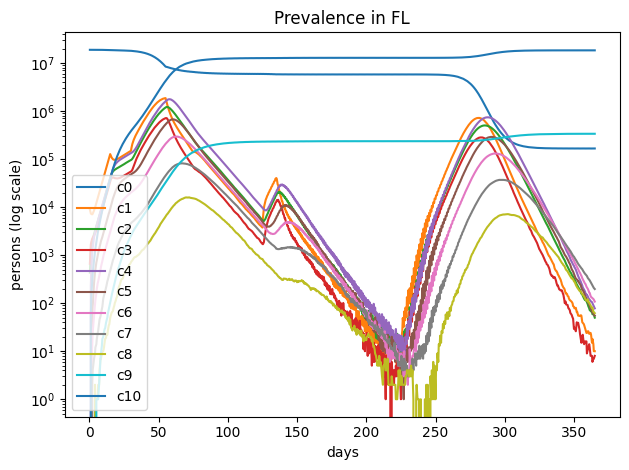

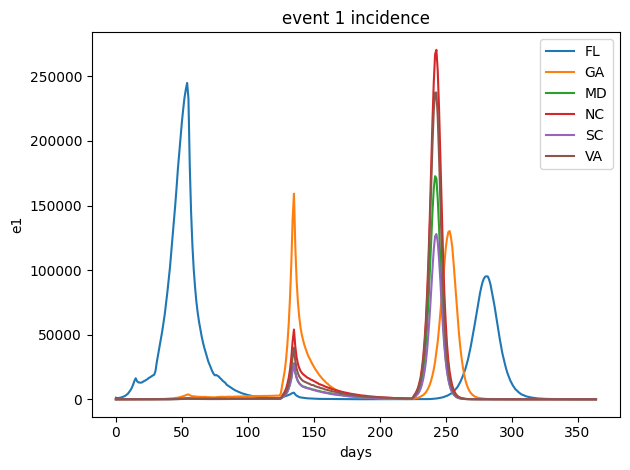

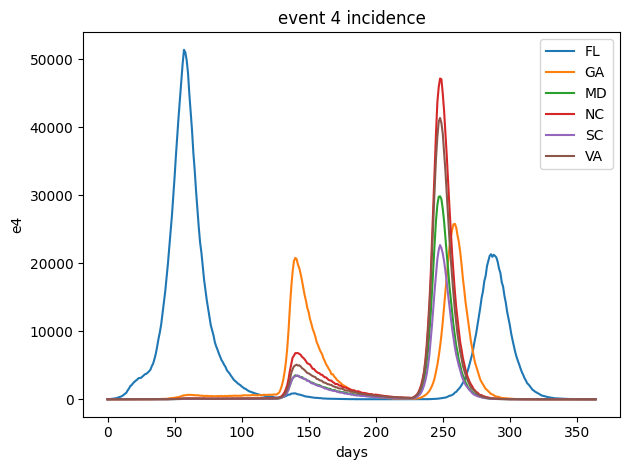

In [15]:
# Time Series Functions in Epymorph
from epymorph.run import plot_event


sim2 = Simulation(
    geo=geo_library['pei'](),
    ipm_builder=ipm_library['sparsemod'](),
    mvm_builder=mm_library['pei']()
)

def calculate_beta(t, _):
    if 0 <= t < 15:
        return 0.7
    elif 15 <= t < 30:
        return 0.2
    elif 30 <= t < 55:
        return 0.4
    elif 55 <= t < 75:
        return 0.1
    elif 75 <= t < 125:
        return 0.15
    elif 125 <= t < 135:
        return 1.2
    elif 135 <= t < 225:
        return 0.1
    else:
        return 1.5

param2 = {
    'move_control': 1,
    'theta': 0.1,
    'omega': [0.55, 0.05],
    'delta': [0.333, 0.5, 0.166, 0.142, 0.125],
    'gamma': [0.166, 0.333, 0.25],
    'rho': [0.4, 0.175, 0.015, 0.2, 0.6],
    'beta': calculate_beta,
}

def init2(ctx: SimContext):
    return single_location(ctx, location=0, seed_size=10_000)

out2 = sim2.run(
    param=param2,
    start_date=date(2015, 1, 1),
    duration_days=365,
    initializer=init2,
    rng=np.random.default_rng(1)
)

plot_pop(out2,0)
plot_event(out2,1)
plot_event(out2,4)


# B-Spline Functions in Epymorph Simulation

B-Spline functions are a type of piecewise-defined polynomial function used in various fields, including computer graphics, signal processing, and numerical analysis. In the context of an Epymorph simulation, B-Spline functions can be employed to model the time-dependent behavior of a parameter, such as the transmission rate (`beta`), as a function of time (`t`) and node (`n`).

## Overview of B-Spline Functions

B-Spline stands for Basis-Spline, and it represents a mathematical spline function defined by a set of control points. The function is constructed by blending together these control points using basis functions. B-Spline functions are flexible and can smoothly represent complex curves or surfaces.

## Using B-Spline Functions for Beta Calculation

In the Epymorph simulation, B-Spline functions can be utilized to dynamically calculate the `beta` value based on the specified time (`t`) and node (`n`). This is achieved through the definition of a B-Spline function within the `calculate_beta` function, as exemplified below:

```python
# Example B-Spline Function for Beta Calculation
def calculate_beta(t, n):
    # Assuming bspline_function is a B-Spline function
    beta = bspline_function(t, n)
    return beta



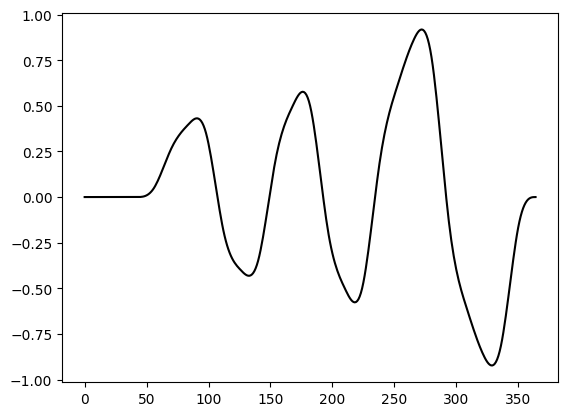

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def cox_de_boor(u, i, k, t):
    """ Evaluates the Cox-de Boor recursion formula. """
    if k == 0:
        return 1.0 if t[i] <= u < t[i+1] else 0.0
    else:
        term1 = 0.0
        term2 = 0.0
        
        if (t[i + k] - t[i]) != 0:
            term1 = ((u - t[i]) / (t[i + k] - t[i])) * cox_de_boor(u, i, k-1, t)
            
        if (t[i + k + 1] - t[i+1]) != 0:
            term2 = ((t[i + k + 1] - u) / (t[i + k + 1] - t[i + 1])) * cox_de_boor(u, i+1, k-1, t)
        
        return term1 + term2

days = 365

knot_vector = np.arange(0, days,14)
knot_length = len(knot_vector)
degree = 3
u_vals = np.linspace(knot_vector[0], knot_vector[-1], days)

N = np.zeros((len(u_vals), knot_length - degree - 1))

for i in range(knot_length - degree - 1):
    for j, u in enumerate(u_vals):
        N[j, i] = cox_de_boor(u, i, degree, knot_vector)

coefficients = np.array([0, 0, 0, 0.3, 
                         0.4, 0.5, -0.3, -0.4, 
                         -0.5, 0.3, 0.5, 0.7, 
                         -0.3,-0.5,-0.7,0.3,0.6,
                         0.9,1.0,-0.3, -0.6,
                         -0.9, -1.0,0.3,0.6,
                         0.9,1.0,-0.3, -0.6,
                         -0.9, -1.0,0.3,0.6,
                         0.9,1.0,-0.3, -0.6,
                         -0.9, -1.0,0.3,0.6,
                         0.9,1.5,-0.3, -0.6,
                         -0.9, -1.0,0.3,0.6,
                         0.9,1.5,-0.3, -0.6,
                         -0.9, -1.0,0.3,0.3,0.3
                         ])

N_alpha = np.zeros_like(N)

for i in range(N.shape[1]):
    N_alpha[:, i] = coefficients[i] * N[:, i]

N_rowsum = np.sum(N_alpha, axis=1)

plt.plot(u_vals, N_rowsum, label='B-spline beta', color='black')


In [14]:
sim3 = Simulation(
    geo=geo_library['pei'](),
    ipm_builder=ipm_library['sirh'](),
    mvm_builder=mm_library['pei']()
)

def cox_de_boor(u, i, k, t):
    """ Evaluates the Cox-de Boor recursion formula. """
    if k == 0:
        return 1.0 if t[i] <= u < t[i+1] else 0.0
    else:
        term1 = 0.0
        term2 = 0.0
        
        if (t[i + k] - t[i]) != 0:
            term1 = ((u - t[i]) / (t[i + k] - t[i])) * cox_de_boor(u, i, k-1, t)
            
        if (t[i + k + 1] - t[i+1]) != 0:
            term2 = ((t[i + k + 1] - u) / (t[i + k + 1] - t[i + 1])) * cox_de_boor(u, i+1, k-1, t)
        
        return term1 + term2


def calculate_beta(_,__):
    days = 365

    knot_vector = np.arange(0, days,14)
    knot_length = len(knot_vector)
    degree = 3
    u_vals = np.linspace(knot_vector[0], knot_vector[-1], days)

    N = np.zeros((len(u_vals), knot_length - degree - 1))

    for i in range(knot_length - degree - 1):
        for j, u in enumerate(u_vals):
            N[j, i] = cox_de_boor(u, i, degree, knot_vector)

    coefficients = np.array([0, 0, 0, 0.3, 
                            0.4, 0.5, -0.3, -0.4, 
                            -0.5, 0.3, 0.5, 0.7, 
                            -0.3,-0.5,-0.7,0.3,0.6,
                            0.9,1.0,-0.3, -0.6,
                            -0.9, -1.0,0.3,0.6,
                            0.9,1.0,-0.3, -0.6,
                            -0.9, -1.0,0.3,0.6,
                            0.9,1.0,-0.3, -0.6,
                            -0.9, -1.0,0.3,0.6,
                            0.9,1.5,-0.3, -0.6,
                            -0.9, -1.0,0.3,0.6,
                            0.9,1.5,-0.3, -0.6,
                            -0.9, -1.0,0.3,0.3,0.3
                            ])

    N_alpha = np.zeros_like(N)

    for i in range(N.shape[1]):
        N_alpha[:, i] = coefficients[i] * N[:, i]

    N_rowsum = np.sum(N_alpha, axis=1)
    return N_rowsum

param2 = {
    'move_control': 1,
    'theta': 0.1,
    'omega': [0.55, 0.05],
    'delta': [0.333, 0.5, 0.166, 0.142, 0.125],
    'gamma': [0.166, 0.333, 0.25],
    'rho': [0.4, 0.175, 0.015, 0.2, 0.6],
    'beta': calculate_beta,
}

def init2(ctx: SimContext):
    return single_location(ctx, location=0, seed_size=10_000)

out2 = sim2.run(
    param=param2,
    start_date=date(2015, 1, 1),
    duration_days=365,
    initializer=init2,
    rng=np.random.default_rng(1)
)

plot_pop(out2,0)
plot_event(out2,1)
plot_event(out2,4)


ValueError: An error occurred while running the parameter function 'calculate_beta': Unsupported function signature for function: calculate_beta. Parameter names can only be 't', 'n', or '_'.